<h2>MNIST dataset in Keras library</h2>
This code is a modified version of the code from this tutorial at <a href="https://elitedatascience.com/keras-tutorial-deep-learning-in-python">EliteDataScience</a>.

<h2>Load data</h2>

In [1]:
# set randomizer seed
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

# Ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import tensorflow as tf

# Load pre-shuffled MNIST data into train and test sets
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

print("Training instances: {}".format(X_train_raw.shape[0]))
print("Test instances: {}".format(X_test_raw.shape[0]))
print()
print("Structure of training set: {}".format(X_train_raw.shape))
print("Structure of labels set: {}".format(y_train_raw.shape))

Using TensorFlow backend.


Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000,)


<h2>Build models</h2>

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
import time

def build_model(X_train, Y_train, type='Linear'):
    # Start timer
    start = time.time()

    model = Sequential()
    
    # define models
    if type == 'Linear':
        # Linear Softmax
        print("Using model Linear")
        model.add(Dense(10, input_dim=784, activation='softmax'))
    if type == 'NN':
        # NN with 1 hidden layer
        print("Using model NN")
        model.add(Dense(256, input_dim=784, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(10, activation='softmax'))
    if (type == 'ConvNet'):
        # Convolutional Neural Network
        print("Using model ConvNet")
        # TensorFlow uses: input_shape=(28,28,1)
        # Theano uses: input_shape=(1,28,28)
        model.add(Convolution2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
        model.add(MaxPooling2D(pool_size=(2,2))) #reduces size to 14x14
        model.add(Convolution2D(32, (5,5), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2))) #reduces size to 7x7
        #fully connected layers
        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train model on training data
    model.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1)
 
    # Evaluate model on test data
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)

    # Stop timer
    end = time.time()

    # Print results
    print("\nTest Accuracy: {0:0.2f}%".format(acc * 100))
    print("Test Loss: {0:0.4f}".format(loss))
    print("Time elapsed: {0:0.2f} sec".format(end - start))
    
    return model

<h2>Linear Softmax model</h2>

In [3]:
# Preprocess input data
X_train = X_train_raw.reshape(X_train_raw.shape[0], 784)
X_test = X_test_raw.reshape(X_test_raw.shape[0], 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize values to 0...1
X_train /= 255 
X_test /= 255
 
# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
Y_train = np_utils.to_categorical(y_train_raw, 10)
Y_test = np_utils.to_categorical(y_test_raw, 10)

# build and evaluate model
model = build_model(X_train, Y_train, 'Linear')

Using model Linear
Epoch 1/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.6322 - acc: 0.8417
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3466 - acc: 0.9058
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.3096 - acc: 0.9141
Epoch 4/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.2923 - acc: 0.9182
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.2821 - acc: 0.9217
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.2744 - acc: 0.9235
Epoch 7/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.2700 - acc: 0.9254
Epoch 8/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.2652 - acc: 0.9264
Epoch 9/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.2620 - acc: 0.9276
Epoch 10/20
60000/60000 [==============================] - 1s 12us/step - loss: 0

<h2>Neural Network model</h2>

In [4]:
# Preprocess input data
X_train = X_train_raw.reshape(X_train_raw.shape[0], 784)
X_test = X_test_raw.reshape(X_test_raw.shape[0], 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize values to 0...1
X_train /= 255 
X_test /= 255
 
# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
Y_train = np_utils.to_categorical(y_train_raw, 10)
Y_test = np_utils.to_categorical(y_test_raw, 10)

# build and evaluate model
model = build_model(X_train, Y_train, 'NN')

Using model NN
Epoch 1/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.3162 - acc: 0.9106
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1432 - acc: 0.9582
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1028 - acc: 0.9697
Epoch 4/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0805 - acc: 0.9755
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0663 - acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0542 - acc: 0.9837
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0478 - acc: 0.9848
Epoch 8/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0400 - acc: 0.9876
Epoch 9/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0359 - acc: 0.9888
Epoch 10/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.029

<h2>ConvNet model</h2>

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
import time

# Start timer
start = time.time()

# Preprocess input data
# Depending on the backend we need to set different image dimensions
# TensorFlow uses: X_train.reshape(X_train.shape[0], 28, 28, 1)
# Theano uses: X_train.reshape(X_train.shape[0], 1, 28, 28)
X_train = X_train_raw.reshape(X_train_raw.shape[0], 28, 28, 1)
X_test = X_test_raw.reshape(X_test_raw.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize values to 0...1
X_train /= 255 
X_test /= 255
 
# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
Y_train = np_utils.to_categorical(y_train_raw, 10)
Y_test = np_utils.to_categorical(y_test_raw, 10)

# build and evaluate model
model = build_model(X_train, Y_train, 'ConvNet')

Using model ConvNet
Epoch 1/20
60000/60000 [==============================] - 36s 596us/step - loss: 0.2097 - acc: 0.9363
Epoch 2/20
60000/60000 [==============================] - 41s 675us/step - loss: 0.0573 - acc: 0.9827
Epoch 3/20
60000/60000 [==============================] - 40s 665us/step - loss: 0.0403 - acc: 0.9877
Epoch 4/20
60000/60000 [==============================] - 40s 666us/step - loss: 0.0310 - acc: 0.9902
Epoch 5/20
60000/60000 [==============================] - 40s 671us/step - loss: 0.0261 - acc: 0.9918
Epoch 6/20
60000/60000 [==============================] - 41s 684us/step - loss: 0.0225 - acc: 0.9931
Epoch 7/20
60000/60000 [==============================] - 40s 666us/step - loss: 0.0186 - acc: 0.9940
Epoch 8/20
60000/60000 [==============================] - 39s 645us/step - loss: 0.0160 - acc: 0.9950
Epoch 9/20
60000/60000 [==============================] - 39s 644us/step - loss: 0.0144 - acc: 0.9956
Epoch 10/20
60000/60000 [==============================] - 39s

<h2>Plot examples</h2>

Label: 5


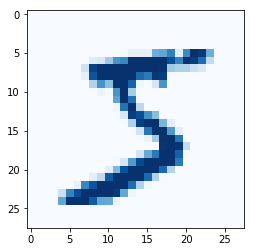

Label: 0


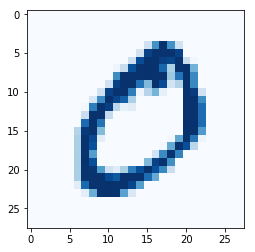

Label: 4


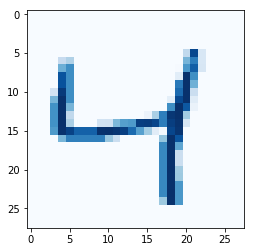

Label: 1


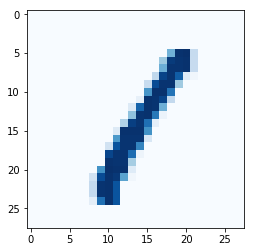

Label: 9


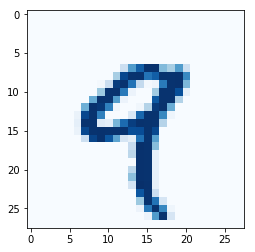

In [5]:
from matplotlib import pyplot as plt

# Plot 5 first images
for i in range(5):
    print("Label: {}".format(y_train_raw[i]))
    plt.imshow(X_train_raw[i], cmap=plt.cm.Blues)
    plt.show()

Label: 6


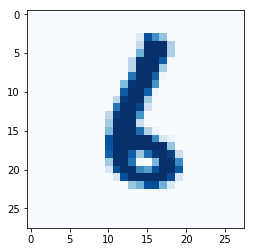

Predicted 834 :  6
Actual 834 : 6


In [13]:
from matplotlib import pyplot as plt

i = 834
print("Label: {}".format(y_test_raw[i]))
plt.imshow(X_test_raw[i], cmap=plt.cm.Blues)
plt.show()

X_p = np.asarray([X_test[i]])
pred = model.predict(X_p)
predicted_label = np.argmax(pred[0])
print("Predicted", i, ": ", predicted_label)
print("Actual", i, ":", y_test_raw[i])